In [8]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/test_notebooks/../../analysis/tools/sidm_processor.py'>

In [9]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "sample" : sample_name, 
    },
).events()

In [10]:
events.cosmicveto.result

<Array [True, True, True, ... True, True, True] type='18359 * bool[parameters={"...'>

In [11]:
p = sidm_processor.SidmProcessor()
out = p.process(events)

In [12]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': <analysis.tools.cutflow.Cutflow at 0x7f0e2336e4c0>,
  'hists': {'pv_z': Hist(Regular(100, -50, 50, name='pv_z', label='pv_z'), storage=Double()) # Sum: 480188.0,
   'pv_rho': Hist(Regular(100, -0.5, 0.5, name='pv_rho', label='pv_rho'), storage=Double()) # Sum: 480188.0}}}

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0e23300490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

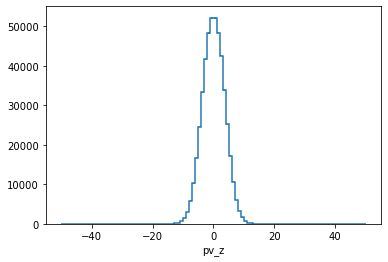

In [13]:
out[sample_name]["hists"]["pv_z"].plot1d()

In [14]:
out[sample_name]["cutflow"].print_table()

cut name        passing individual cut    passing all cuts
------------  ------------------------  ------------------
No selection                     18359               18359
PV filter                        18359               18359
Cosmic veto                      18359               18359
